# ESTI019 - CSM 


# Lab3 - Codificação de Imagem por DCT e Animação

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
from google.colab import drive
!ls -l "drive/My Drive/Colab Notebooks"   # verifica se montou o drive e se os arquivos estão lá...
bgr1 = cv.imread('drive/My Drive/Colab Notebooks/messi.jpg') # leitura no formato BGR!
altura, largura, camadas = bgr1.shape
print("Resolução: ", largura, " x ", altura, "PIXELS. ", camadas, " camadas.")

total 8636
-rw------- 1 root root 1220275 Oct 14 00:35 arthur.JPG
-rw------- 1 root root 1207000 Oct 14 00:35 daniel.JPG
-rw------- 1 root root   31641 Oct 10  2020 EC+1+-+Classificação.ipynb
-rw------- 1 root root 1025934 Oct 14 00:07 happy-pad-chord.wav
-rw------- 1 root root 1154564 Oct 14 00:36 ighor.JPG
-rw------- 1 root root  909697 Oct 14 01:01 Lab3.ipynb
-rw------- 1 root root  786486 Oct 14 00:07 lena.bmp
-rw------- 1 root root 1210084 Oct 14 00:35 mariana.JPG
-rw------- 1 root root   72937 Oct 14 00:07 messi.jpg
-rw------- 1 root root     317 Oct 10  2020 Untitled0.ipynb
-rw------- 1 root root 1220870 Oct 14 00:35 vitor.JPG
Resolução:  548  x  342 PIXELS.  3  camadas.


Separa os canais e re-arranja para formar imagem RGB

In [5]:
b1, g1, r1 = cv.split(bgr1)
rgb2 = cv.merge([r1,g1,b1])


# Q1 - O que foi feito aqui?
O comando split foi utilizado para dividir as imagens em seus 3 canais de cor (RGB).
Após isso o comando merge foi gerado para que esses canais foram combinados para formar a imagem com as camadas de cor corretas.


Imprime cores trocadas (BGR) e reais (RGB)

Text(0.5, 1.0, 'RBG')

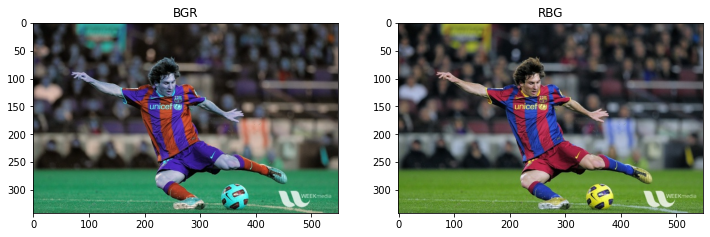

In [6]:
plt.figure(figsize=[12, 5])
plt.subplot(121); plt.imshow(bgr1); plt.title('BGR')
plt.subplot(122); plt.imshow(rgb2); plt.title('RBG')


Converte para os formatos YCrCb e HSV


Text(0.5, 1.0, 'HSV')

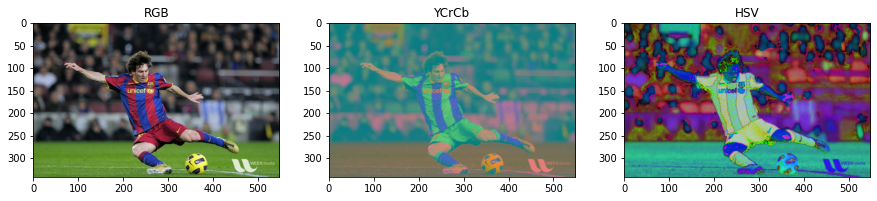

In [7]:
ycrcb = cv.cvtColor(bgr1, cv.COLOR_BGR2YCrCb)
hsv = cv.cvtColor(bgr1, cv.COLOR_BGR2HSV)
plt.figure(figsize=[15,6])
plt.subplot(131); plt.imshow(rgb2); plt.title('RGB')
plt.subplot(132); plt.imshow(ycrcb); plt.title('YCrCb')
plt.subplot(133); plt.imshow(hsv); plt.title('HSV')

Separação das camadas RGB individualmente

In [8]:
imageR = rgb2.copy()
imageR[:, :, 1:3] = 0
imageG = rgb2.copy()
imageG[:, :, 0] = 0; imageG[:, :, 2] = 0
imageB = rgb2.copy()
imageB[:, :, 0:2] = 0

# Q2 - O que foi feito aqui?

Nesse código as camadas RGB foram separadas manualmente e individualmente.
Desse modo, é possível visualizar esssas camadas individualmente.

Text(0.5, 1.0, 'RGB_Camada B')

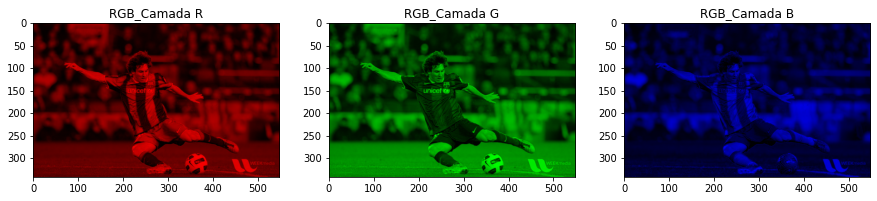

In [9]:
plt.figure(figsize=[15,6])
plt.subplot(131); plt.imshow(imageR); plt.title('RGB_Camada R')
plt.subplot(132); plt.imshow(imageG); plt.title('RGB_Camada G')
plt.subplot(133); plt.imshow(imageB); plt.title('RGB_Camada B')

Separação dos Canais YCbCr

In [10]:
y1, cr1, cb1 = cv.split(ycrcb)
imageCR = ycrcb.copy()
imageCR[:, :, 0] = 0
imageCR[:, :, 2] = 0
Cr = cv.cvtColor(imageCR, cv.COLOR_YCrCb2RGB)

In [11]:
imageCB = ycrcb.copy()
imageCB[:, :, 0] = 0
imageCB[:, :, 1] = 0
Cb = cv.cvtColor(imageCB, cv.COLOR_YCrCb2RGB)

Text(0.5, 1.0, 'YCrCb_Cb')

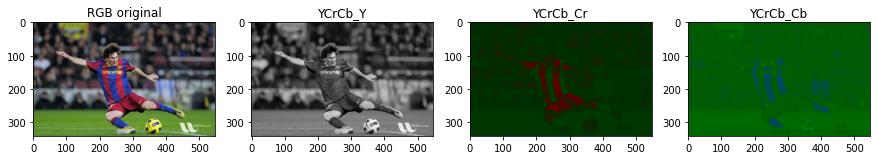

In [12]:
plt.figure(figsize=[15, 5])
plt.subplot(141); plt.imshow(rgb2); plt.title('RGB original')
plt.subplot(142); plt.imshow(y1, cmap='gray'); plt.title('YCrCb_Y')
plt.subplot(143); plt.imshow(Cr); plt.title('YCrCb_Cr')
plt.subplot(144); plt.imshow(Cb); plt.title('YCrCb_Cb')

# Com as Imagens do Grupo:


1.   Faça o mesmo com uma imagem de cada integrante do grupo e
2.   Com a foto montagem de todos os do grupo, lembrando das roupas com cores diferentes, preferencialmente (R, G e B).

Carregar as imagens do grupo em BGR

In [38]:
ighor = cv.imread('drive/My Drive/Colab Notebooks/ighor.JPG')
daniel = cv.imread('drive/My Drive/Colab Notebooks/daniel.JPG')
arthur = cv.imread('drive/My Drive/Colab Notebooks/arthur.JPG')
mariana = cv.imread('drive/My Drive/Colab Notebooks/mariana.JPG')
vitor = cv.imread('drive/My Drive/Colab Notebooks/vitor.JPG')
grupo = cv.imread('drive/My Drive/Colab Notebooks/grupo.jpeg')

In [39]:
b1ighor, g1ighor, r1ighor = cv.split(ighor)
b1daniel, g1daniel, r1daniel = cv.split(daniel)
b1arthur, g1arthur, r1arthur = cv.split(arthur)
b1mariana, g1mariana, r1mariana = cv.split(mariana)
b1vitor, g1vitor, r1vitor = cv.split(vitor)
b1grupo, g1grupo, r1grupo = cv.split(grupo)
rgbighor = cv.merge([r1ighor, g1ighor, b1ighor])
rgbdaniel = cv.merge([r1daniel, g1daniel, b1daniel])
rgbarthur = cv.merge([r1arthur, g1arthur, b1arthur])
rgbmariana = cv.merge([r1mariana, g1mariana, b1mariana])
rgbvitor = cv.merge([r1vitor, g1vitor, b1vitor])
rgbgrupo = cv.merge([r1grupo, g1grupo, b1grupo])

Impressão das cores trocadas

Text(0.5, 1.0, 'BGR - Grupo')

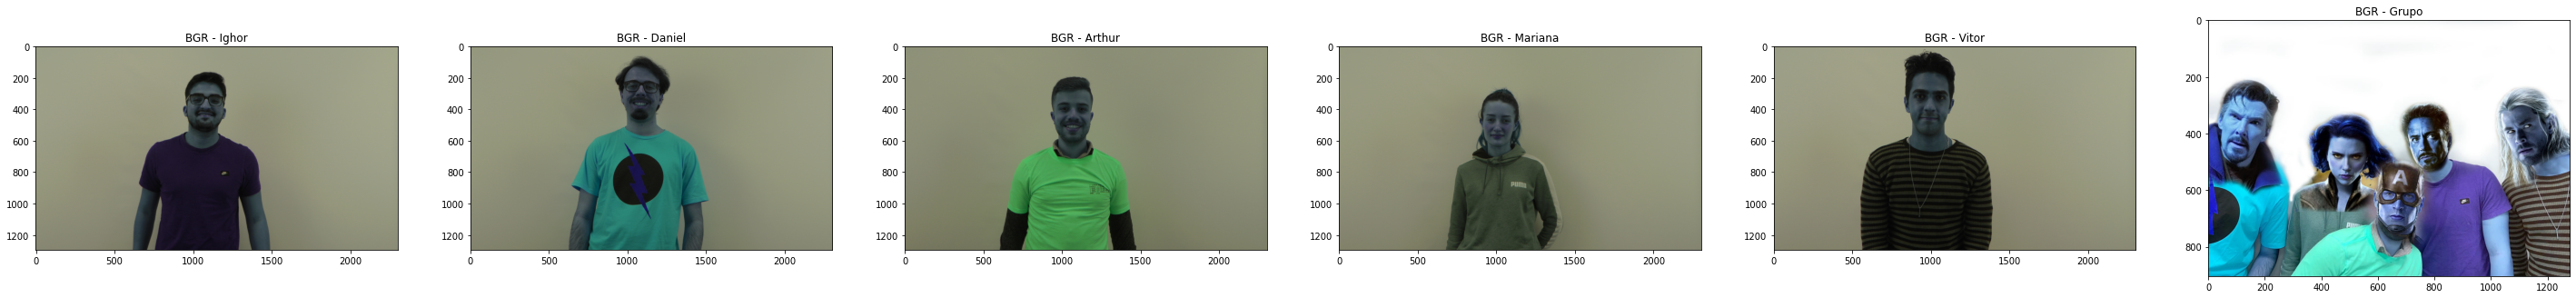

In [40]:
plt.figure(figsize=[50, 50])
plt.subplot(161); plt.imshow(ighor); plt.title('BGR - Ighor')
plt.subplot(162); plt.imshow(daniel); plt.title('BGR - Daniel')
plt.subplot(163); plt.imshow(arthur); plt.title('BGR - Arthur')
plt.subplot(164); plt.imshow(mariana); plt.title('BGR - Mariana')
plt.subplot(165); plt.imshow(vitor); plt.title('BGR - Vitor')
plt.subplot(166); plt.imshow(grupo); plt.title('BGR - Grupo')

Text(0.5, 1.0, 'RGB - Grupo')

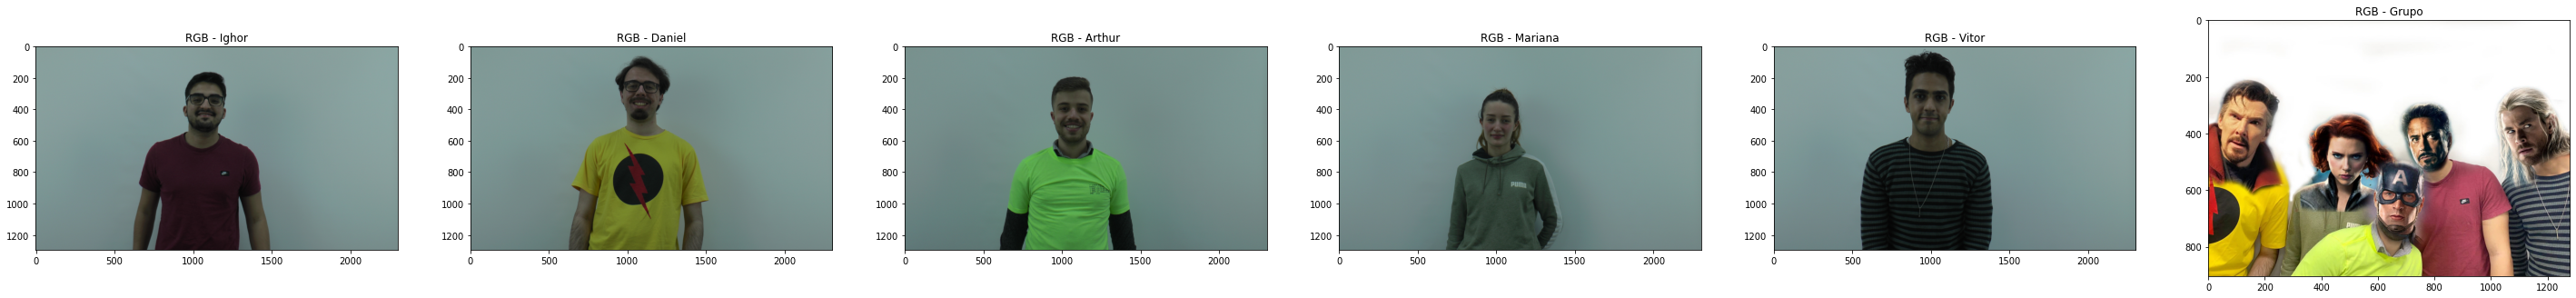

In [42]:
plt.figure(figsize=[50, 50])
plt.subplot(161); plt.imshow(rgbighor); plt.title('RGB - Ighor')
plt.subplot(162); plt.imshow(rgbdaniel); plt.title('RGB - Daniel')
plt.subplot(163); plt.imshow(rgbarthur); plt.title('RGB - Arthur')
plt.subplot(164); plt.imshow(rgbmariana); plt.title('RGB - Mariana')
plt.subplot(165); plt.imshow(rgbvitor); plt.title('RGB - Vitor')
plt.subplot(166); plt.imshow(rgbgrupo); plt.title('RGB - Grupo')

Converte para os formatos YCrCb e HSV

Text(0.5, 1.0, 'YCrCb - Grupo')

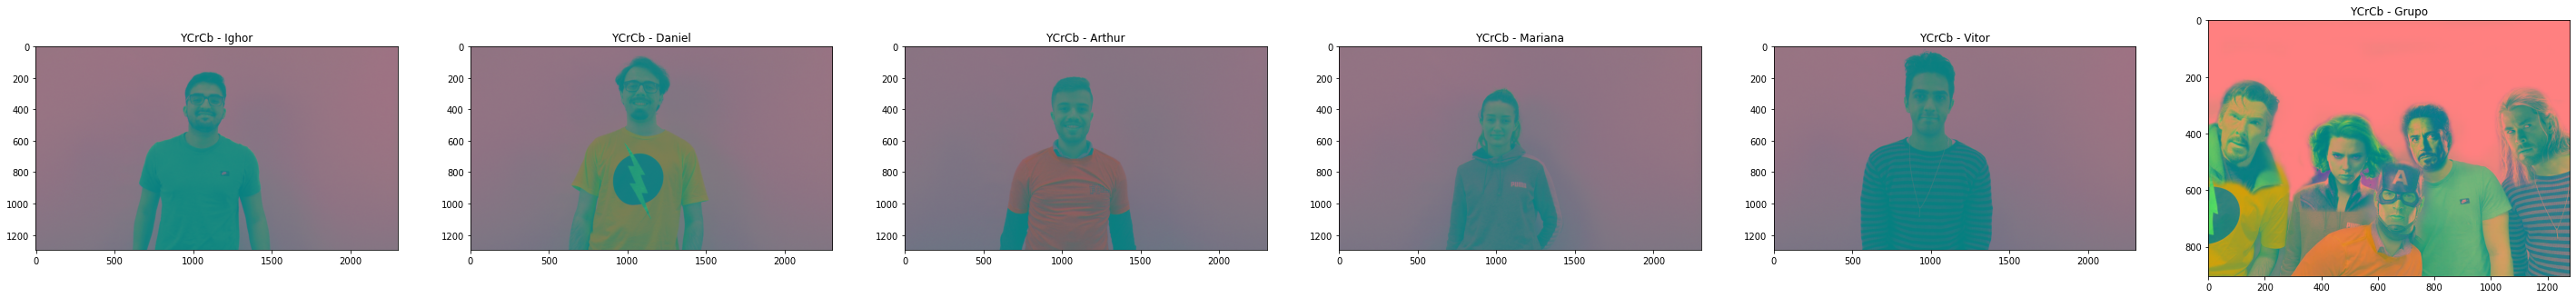

In [43]:
ycrcbighor = cv.cvtColor(ighor, cv.COLOR_BGR2YCrCb)
ycrcbdaniel = cv.cvtColor(daniel, cv.COLOR_BGR2YCrCb)
ycrcbarthur = cv.cvtColor(arthur, cv.COLOR_BGR2YCrCb)
ycrcbmariana = cv.cvtColor(mariana, cv.COLOR_BGR2YCrCb)
ycrcbvitor = cv.cvtColor(vitor, cv.COLOR_BGR2YCrCb)
ycrcbgrupo = cv.cvtColor(grupo, cv.COLOR_BGR2YCrCb)
plt.figure(figsize=[50,50])
plt.subplot(161); plt.imshow(ycrcbighor); plt.title('YCrCb - Ighor')
plt.subplot(162); plt.imshow(ycrcbdaniel); plt.title('YCrCb - Daniel')
plt.subplot(163); plt.imshow(ycrcbarthur); plt.title('YCrCb - Arthur')
plt.subplot(164); plt.imshow(ycrcbmariana); plt.title('YCrCb - Mariana')
plt.subplot(165); plt.imshow(ycrcbvitor); plt.title('YCrCb - Vitor')
plt.subplot(166); plt.imshow(ycrcbgrupo); plt.title('YCrCb - Grupo')

Text(0.5, 1.0, 'HSV - Grupo')

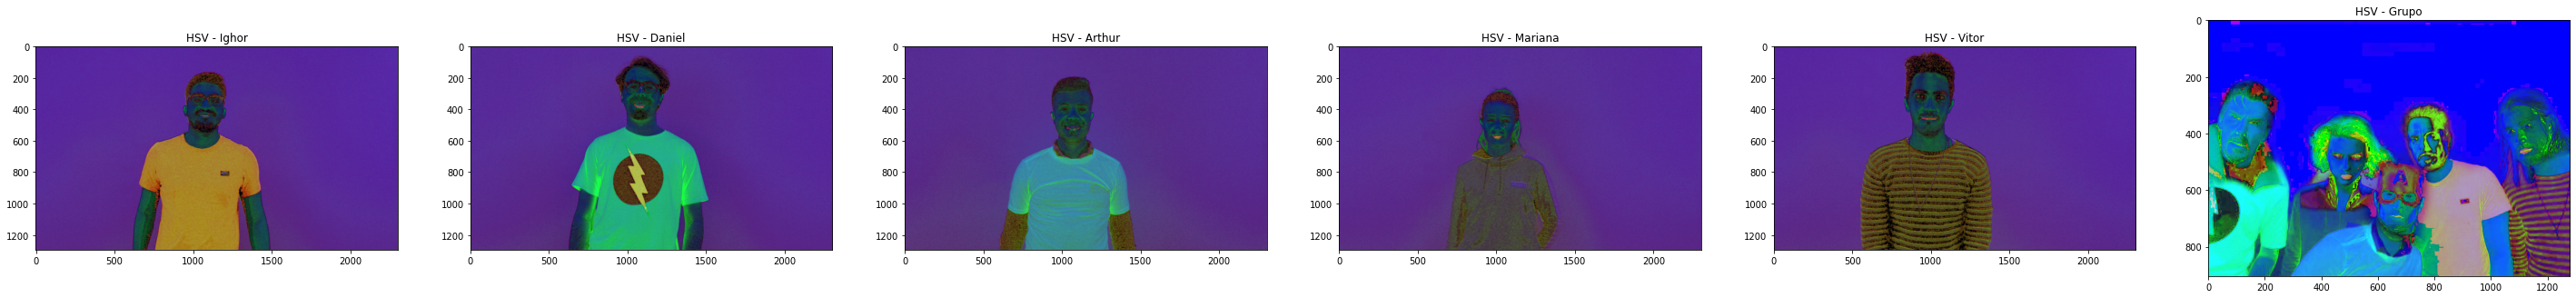

In [44]:
hsvighor = cv.cvtColor(ighor, cv.COLOR_BGR2HSV)
hsvdaniel = cv.cvtColor(daniel, cv.COLOR_BGR2HSV)
hsvarthur = cv.cvtColor(arthur, cv.COLOR_BGR2HSV)
hsvmariana = cv.cvtColor(mariana, cv.COLOR_BGR2HSV)
hsvvitor = cv.cvtColor(vitor, cv.COLOR_BGR2HSV)
hsvgrupo = cv.cvtColor(grupo, cv.COLOR_BGR2HSV)
plt.figure(figsize=[50,50])
plt.subplot(161); plt.imshow(hsvighor); plt.title('HSV - Ighor')
plt.subplot(162); plt.imshow(hsvdaniel); plt.title('HSV - Daniel')
plt.subplot(163); plt.imshow(hsvarthur); plt.title('HSV - Arthur')
plt.subplot(164); plt.imshow(hsvmariana); plt.title('HSV - Mariana')
plt.subplot(165); plt.imshow(hsvvitor); plt.title('HSV - Vitor')
plt.subplot(166); plt.imshow(hsvgrupo); plt.title('HSV - Grupo')

Separação das camadas RGB individualmente

Text(0.5, 1.0, 'RGB_Camada B')

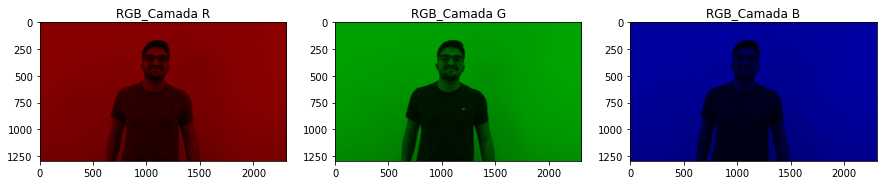

In [25]:
ighorR = rgbighor.copy()
ighorR[:, :, 1:3] = 0
ighorG = rgbighor.copy()
ighorG[:, :, 0] = 0; ighorG[:, :, 2] = 0
ighorB = rgbighor.copy()
ighorB[:, :, 0:2] = 0  

plt.figure(figsize=[15,6])
plt.subplot(131); plt.imshow(ighorR); plt.title('RGB_Camada R')
plt.subplot(132); plt.imshow(ighorG); plt.title('RGB_Camada G')
plt.subplot(133); plt.imshow(ighorB); plt.title('RGB_Camada B')

Text(0.5, 1.0, 'RGB_Camada B')

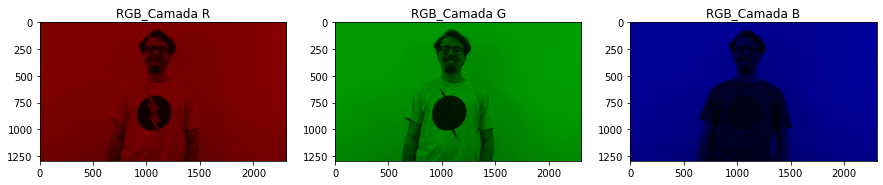

In [26]:
danielR = rgbdaniel.copy()
danielR[:, :, 1:3] = 0
danielG = rgbdaniel.copy()
danielG[:, :, 0] = 0; danielG[:, :, 2] = 0
danielB = rgbdaniel.copy()
danielB[:, :, 0:2] = 0  

plt.figure(figsize=[15,6])
plt.subplot(131); plt.imshow(danielR); plt.title('RGB_Camada R')
plt.subplot(132); plt.imshow(danielG); plt.title('RGB_Camada G')
plt.subplot(133); plt.imshow(danielB); plt.title('RGB_Camada B')

Text(0.5, 1.0, 'RGB_Camada B')

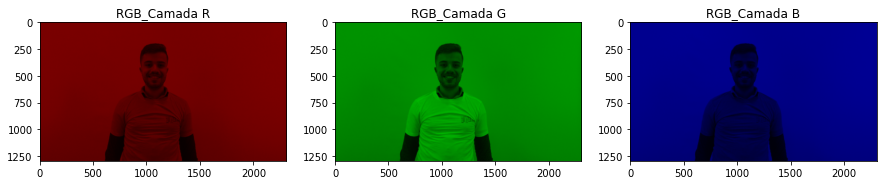

In [27]:
arthurR = rgbarthur.copy()
arthurR[:, :, 1:3] = 0
arthurG = rgbarthur.copy()
arthurG[:, :, 0] = 0; arthurG[:, :, 2] = 0
arthurB = rgbarthur.copy()
arthurB[:, :, 0:2] = 0  

plt.figure(figsize=[15,6])
plt.subplot(131); plt.imshow(arthurR); plt.title('RGB_Camada R')
plt.subplot(132); plt.imshow(arthurG); plt.title('RGB_Camada G')
plt.subplot(133); plt.imshow(arthurB); plt.title('RGB_Camada B')

Text(0.5, 1.0, 'RGB_Camada B')

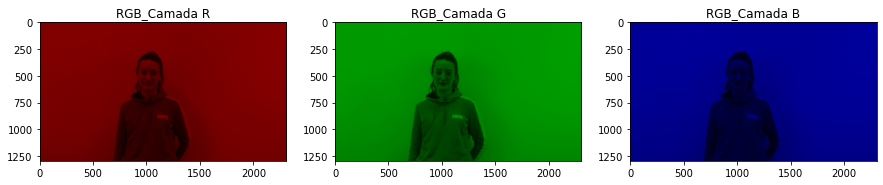

In [28]:
marianaR = rgbmariana.copy()
marianaR[:, :, 1:3] = 0
marianaG = rgbmariana.copy()
marianaG[:, :, 0] = 0; marianaG[:, :, 2] = 0
marianaB = rgbmariana.copy()
marianaB[:, :, 0:2] = 0  

plt.figure(figsize=[15,6])
plt.subplot(131); plt.imshow(marianaR); plt.title('RGB_Camada R')
plt.subplot(132); plt.imshow(marianaG); plt.title('RGB_Camada G')
plt.subplot(133); plt.imshow(marianaB); plt.title('RGB_Camada B')

Text(0.5, 1.0, 'RGB_Camada B')

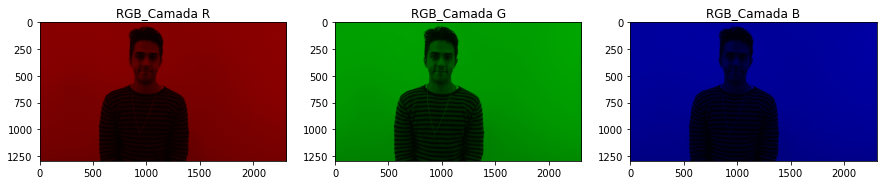

In [29]:
vitorR = rgbvitor.copy()
vitorR[:, :, 1:3] = 0
vitorG = rgbvitor.copy()
vitorG[:, :, 0] = 0; vitorG[:, :, 2] = 0
vitorB = rgbvitor.copy()
vitorB[:, :, 0:2] = 0  

plt.figure(figsize=[15,6])
plt.subplot(131); plt.imshow(vitorR); plt.title('RGB_Camada R')
plt.subplot(132); plt.imshow(vitorG); plt.title('RGB_Camada G')
plt.subplot(133); plt.imshow(vitorB); plt.title('RGB_Camada B')

Text(0.5, 1.0, 'RGB_Camada B')

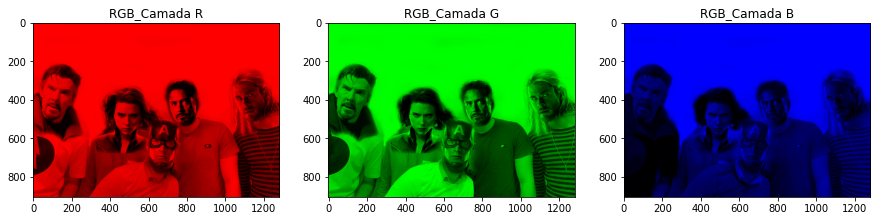

In [45]:
grupoR = rgbgrupo.copy()
grupoR[:, :, 1:3] = 0
grupoG = rgbgrupo.copy()
grupoG[:, :, 0] = 0; grupoG[:, :, 2] = 0
grupoB = rgbgrupo.copy()
grupoB[:, :, 0:2] = 0  

plt.figure(figsize=[15,6])
plt.subplot(131); plt.imshow(grupoR); plt.title('RGB_Camada R')
plt.subplot(132); plt.imshow(grupoG); plt.title('RGB_Camada G')
plt.subplot(133); plt.imshow(grupoB); plt.title('RGB_Camada B')

Separação dos Canais YCbCr

Text(0.5, 1.0, 'YCrCb_Cb')

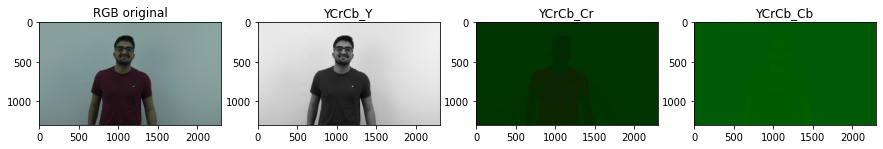

In [33]:
y1ighor, cr1ighor, cb1ighor = cv.split(ycrcbighor)
ighorCR = ycrcbighor.copy()
ighorCR[:, :, 0] = 0
ighorCR[:, :, 2] = 0
ighorCr = cv.cvtColor(ighorCR, cv.COLOR_YCrCb2RGB)

ighorCB = ycrcbighor.copy()
ighorCB[:, :, 0] = 0
ighorCB[:, :, 1] = 0
ighorCb = cv.cvtColor(ighorCB, cv.COLOR_YCrCb2RGB)

plt.figure(figsize=[15, 5])
plt.subplot(141); plt.imshow(rgbighor); plt.title('RGB original')
plt.subplot(142); plt.imshow(y1ighor, cmap='gray'); plt.title('YCrCb_Y')
plt.subplot(143); plt.imshow(ighorCr); plt.title('YCrCb_Cr')
plt.subplot(144); plt.imshow(ighorCb); plt.title('YCrCb_Cb')

Text(0.5, 1.0, 'YCrCb_Cb')

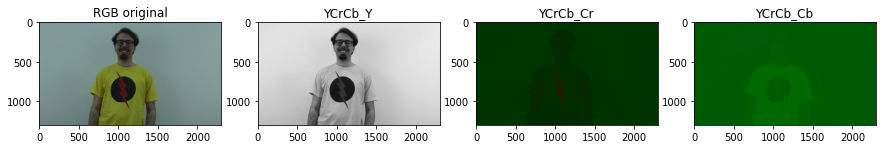

In [34]:
y1daniel, cr1daniel, cb1daniel = cv.split(ycrcbdaniel)
danielCR = ycrcbdaniel.copy()
danielCR[:, :, 0] = 0
danielCR[:, :, 2] = 0
danielCr = cv.cvtColor(danielCR, cv.COLOR_YCrCb2RGB)

danielCB = ycrcbdaniel.copy()
danielCB[:, :, 0] = 0
danielCB[:, :, 1] = 0
danielCb = cv.cvtColor(danielCB, cv.COLOR_YCrCb2RGB)

plt.figure(figsize=[15, 5])
plt.subplot(141); plt.imshow(rgbdaniel); plt.title('RGB original')
plt.subplot(142); plt.imshow(y1daniel, cmap='gray'); plt.title('YCrCb_Y')
plt.subplot(143); plt.imshow(danielCr); plt.title('YCrCb_Cr')
plt.subplot(144); plt.imshow(danielCb); plt.title('YCrCb_Cb')

Text(0.5, 1.0, 'YCrCb_Cb')

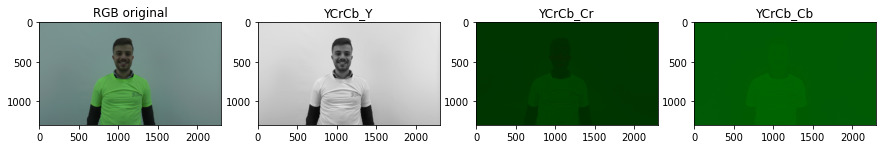

In [35]:
y1arthur, cr1arthur, cb1arthur = cv.split(ycrcbarthur)
arthurCR = ycrcbarthur.copy()
arthurCR[:, :, 0] = 0
arthurCR[:, :, 2] = 0
arthurCr = cv.cvtColor(arthurCR, cv.COLOR_YCrCb2RGB)

arthurCB = ycrcbarthur.copy()
arthurCB[:, :, 0] = 0
arthurCB[:, :, 1] = 0
arthurCb = cv.cvtColor(arthurCB, cv.COLOR_YCrCb2RGB)

plt.figure(figsize=[15, 5])
plt.subplot(141); plt.imshow(rgbarthur); plt.title('RGB original')
plt.subplot(142); plt.imshow(y1arthur, cmap='gray'); plt.title('YCrCb_Y')
plt.subplot(143); plt.imshow(arthurCr); plt.title('YCrCb_Cr')
plt.subplot(144); plt.imshow(arthurCb); plt.title('YCrCb_Cb')

Text(0.5, 1.0, 'YCrCb_Cb')

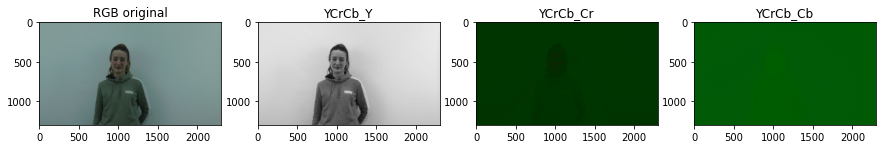

In [36]:
y1mariana, cr1mariana, cb1mariana = cv.split(ycrcbmariana)
marianaCR = ycrcbmariana.copy()
marianaCR[:, :, 0] = 0
marianaCR[:, :, 2] = 0
marianaCr = cv.cvtColor(marianaCR, cv.COLOR_YCrCb2RGB)

marianaCB = ycrcbmariana.copy()
marianaCB[:, :, 0] = 0
marianaCB[:, :, 1] = 0
marianaCb = cv.cvtColor(marianaCB, cv.COLOR_YCrCb2RGB)

plt.figure(figsize=[15, 5])
plt.subplot(141); plt.imshow(rgbmariana); plt.title('RGB original')
plt.subplot(142); plt.imshow(y1mariana, cmap='gray'); plt.title('YCrCb_Y')
plt.subplot(143); plt.imshow(marianaCr); plt.title('YCrCb_Cr')
plt.subplot(144); plt.imshow(marianaCb); plt.title('YCrCb_Cb')

Text(0.5, 1.0, 'YCrCb_Cb')

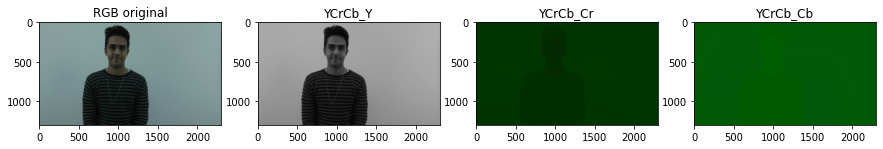

In [37]:
y1vitor, cr1vitor, cb1vitor = cv.split(ycrcbvitor)
vitorCR = ycrcbvitor.copy()
vitorCR[:, :, 0] = 0
vitorCR[:, :, 2] = 0
vitorCr = cv.cvtColor(vitorCR, cv.COLOR_YCrCb2RGB)

vitorCB = ycrcbvitor.copy()
vitorCB[:, :, 0] = 0
vitorCB[:, :, 1] = 0
vitorCb = cv.cvtColor(vitorCB, cv.COLOR_YCrCb2RGB)

plt.figure(figsize=[15, 5])
plt.subplot(141); plt.imshow(rgbvitor); plt.title('RGB original')
plt.subplot(142); plt.imshow(y1vitor, cmap='gray'); plt.title('YCrCb_Y')
plt.subplot(143); plt.imshow(vitorCr); plt.title('YCrCb_Cr')
plt.subplot(144); plt.imshow(vitorCb); plt.title('YCrCb_Cb')

Text(0.5, 1.0, 'YCrCb_Cb')

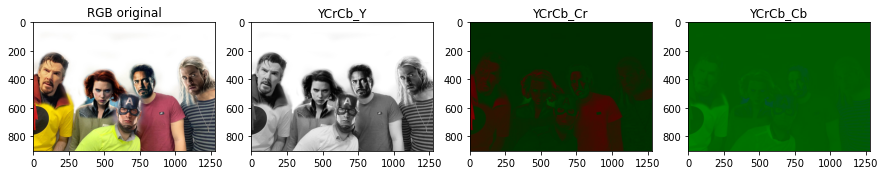

In [46]:
y1grupo, cr1grupo, cb1grupo = cv.split(ycrcbgrupo)
grupoCR = ycrcbgrupo.copy()
grupoCR[:, :, 0] = 0
grupoCR[:, :, 2] = 0
grupoCr = cv.cvtColor(grupoCR, cv.COLOR_YCrCb2RGB)

grupoCB = ycrcbgrupo.copy()
grupoCB[:, :, 0] = 0
grupoCB[:, :, 1] = 0
grupoCb = cv.cvtColor(grupoCB, cv.COLOR_YCrCb2RGB)

plt.figure(figsize=[15, 5])
plt.subplot(141); plt.imshow(rgbgrupo); plt.title('RGB original')
plt.subplot(142); plt.imshow(y1grupo, cmap='gray'); plt.title('YCrCb_Y')
plt.subplot(143); plt.imshow(grupoCr); plt.title('YCrCb_Cr')
plt.subplot(144); plt.imshow(grupoCb); plt.title('YCrCb_Cb')